<a href="https://colab.research.google.com/github/ZynTran/test/blob/main/khaycom_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/ai-for-mr-thnh")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ppduyn/ai-for-mr-thnh/versions/4


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import kagglehub

# Cấu hình
image_size = 64
dishes_classes = [
    'Braised fish', 'Braised meat', 'Braised meat w egg',
    'Fried chicken', 'Fried egg', 'Mustard soup',
    'Rice', 'Sour Broth', 'Spinach', 'Tofu'
]

# Tải dataset từ Kaggle
path = kagglehub.dataset_download("ppduyn/ai-for-mr-thnh")

data, labels = [], []

# Load ảnh từ thư mục
for i, dishes in enumerate(dishes_classes):
    folder = os.path.join(path, "AI for Mr.Thịnh", dishes)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img)
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(528, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(dishes_classes), activation='softmax')
])

# Compile và huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test))

# Lưu mô hình
model.save('model.h5')


print("✅ Đã lưu model thành công!")

100%|██████████| 288M/288M [00:02<00:00, 131MB/s]

Extracting files...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
236/236 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.4183 - loss: 2.0616 - val_accuracy: 0.7220 - val_loss: 0.7120
Epoch 2/15
236/236 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.7415 - loss: 0.6768 - val_accuracy: 0.7508 - val_loss: 0.6967
Epoch 3/15
236/236 ━━━━━━━━━━━━━━━━━━━━ 265s 990ms/step - accuracy: 0.8612 - loss: 0.4051 - val_accuracy: 0.7390 - val_loss: 0.7804
Epoch 4/15
124/236 ━━━━━━━━━━━━━━━━━━━━ 1:40 901ms/step - accuracy: 0.9491 - loss: 0.1974

KeyboardInterrupt: 

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import kagglehub

# --- Cấu hình ---
image_size = 64
dishes_classes = [
    'Braised fish', 'Braised meat', 'Braised meat w egg',
    'Fried chicken', 'Fried egg', 'Mustard soup',
    'Rice', 'Sour Broth', 'Spinach', 'Tofu'
]

# --- Tải dataset từ Kaggle ---
path = kagglehub.dataset_download("ppduyn/ai-for-mr-thnh")

data, labels = [], []

# --- Load ảnh ---
for i, dish in enumerate(dishes_classes):
    folder = os.path.join(path, "AI for Mr.Thịnh", dish)
    if not os.path.isdir(folder):
        continue
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img)
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))

# --- Chia train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# --- Image Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# --- Xây dựng mô hình CNN sâu hơn ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(dishes_classes), activation='softmax')
])

# --- Compile ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Callback ---
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

# --- Huấn luyện ---
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=callbacks
)

# --- Lưu mô hình cuối cùng ---
model.save('final_model.h5')
print("✅ Đã lưu model thành công!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.2723 - loss: 2.0370

74/74 ━━━━━━━━━━━━━━━━━━━━ 37s 466ms/step - accuracy: 0.2735 - loss: 2.0329 - val_accuracy: 0.5407 - val_loss: 1.2266
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.5308 - loss: 1.2654

74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - accuracy: 0.5310 - loss: 1.2644 - val_accuracy: 0.6542 - val_loss: 0.9389
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 365ms/step - accuracy: 0.5832 - loss: 1.0601 - val_accuracy: 0.6373 - val_loss: 1.0199
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.6359 - loss: 0.9916

74/74 ━━━━━━━━━━━━━━━━━━━━ 47s 448ms/step - accuracy: 0.6362 - loss: 0.9911 - val_accuracy: 0.6661 - val_loss: 0.9059
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - accuracy: 0.6837 - loss: 0.9061 - val_accuracy: 0.6492 - val_loss: 0.9935
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.6846 - loss: 0.8528

74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.6846 - loss: 0.8527 - val_accuracy: 0.7017 - val_loss: 0.8111
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 28s 382ms/step - accuracy: 0.6976 - loss: 0.8314 - val_accuracy: 0.7034 - val_loss: 0.9099
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 386ms/step - accuracy: 0.7350 - loss: 0.7307 - val_accuracy: 0.6729 - val_loss: 0.9173
Epoch 9/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.7319 - loss: 0.7443

74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 368ms/step - accuracy: 0.7318 - loss: 0.7444 - val_accuracy: 0.7593 - val_loss: 0.7182
Epoch 10/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 362ms/step - accuracy: 0.7439 - loss: 0.7188 - val_accuracy: 0.6898 - val_loss: 1.0037
Epoch 11/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 367ms/step - accuracy: 0.7353 - loss: 0.6986 - val_accuracy: 0.6881 - val_loss: 0.8942
Epoch 12/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.7746 - loss: 0.6322

74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.7745 - loss: 0.6323 - val_accuracy: 0.7729 - val_loss: 0.6835
Epoch 13/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 409ms/step - accuracy: 0.7758 - loss: 0.6083 - val_accuracy: 0.6864 - val_loss: 0.9418
Epoch 14/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7717 - loss: 0.6021

74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 389ms/step - accuracy: 0.7717 - loss: 0.6022 - val_accuracy: 0.8017 - val_loss: 0.6267
Epoch 15/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.8031 - loss: 0.5566 - val_accuracy: 0.7678 - val_loss: 0.6439
Epoch 16/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 368ms/step - accuracy: 0.7936 - loss: 0.5487 - val_accuracy: 0.7695 - val_loss: 0.7153
Epoch 17/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.7884 - loss: 0.5615

74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 408ms/step - accuracy: 0.7884 - loss: 0.5616 - val_accuracy: 0.8373 - val_loss: 0.5020
Epoch 18/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.8249 - loss: 0.5080 - val_accuracy: 0.7949 - val_loss: 0.6283
Epoch 19/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 363ms/step - accuracy: 0.7927 - loss: 0.5581 - val_accuracy: 0.7831 - val_loss: 0.6491
Epoch 20/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 391ms/step - accuracy: 0.8163 - loss: 0.5382 - val_accuracy: 0.7831 - val_loss: 0.6351
Epoch 21/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 413ms/step - accuracy: 0.8425 - loss: 0.4322 - val_accuracy: 0.7898 - val_loss: 0.5994
Epoch 22/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 404ms/step - accuracy: 0.8517 - loss: 0.4485 - val_accuracy: 0.8153 - val_loss: 0.5789


✅ Đã lưu model thành công!


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import kagglehub

# --- Cấu hình ---
image_size = 64
num_classes = 10
batch_size = 32
epochs = 50

dishes_classes = [
    'Braised fish', 'Braised meat', 'Braised meat w egg',
    'Fried chicken', 'Fried egg', 'Mustard soup',
    'Rice', 'Sour Broth', 'Spinach', 'Tofu'
]

# --- Tải dataset từ Kaggle ---
path = kagglehub.dataset_download("ppduyn/ai-for-mr-thnh")

data, labels = [], []

# --- Load ảnh từ thư mục ---
for i, dish in enumerate(dishes_classes):
    folder = os.path.join(path, "AI for Mr.Thịnh", dish)
    if not os.path.isdir(folder):
        continue
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0  # Normal hóa
            data.append(img)
            labels.append(i)
        except Exception as e:
            continue  # Bỏ qua ảnh lỗi

# --- Xử lý dữ liệu ---
data = np.array(data)
labels = to_categorical(labels, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# --- Image Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)
datagen.fit(X_train)

# --- Xây dựng mô hình CNN ---
model = Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(image_size, image_size, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# --- Compile ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Callbacks ---
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# --- Huấn luyện ---
model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=callbacks
)

# --- Lưu mô hình cuối cùng ---
model.save('final_model.h5')
print("✅ Đã lưu model thành công!")



0: 640x640 5 bowls, 7150.2ms
Speed: 9.1ms preprocess, 7150.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
🧾 Tổng tiền: 33,000 VND


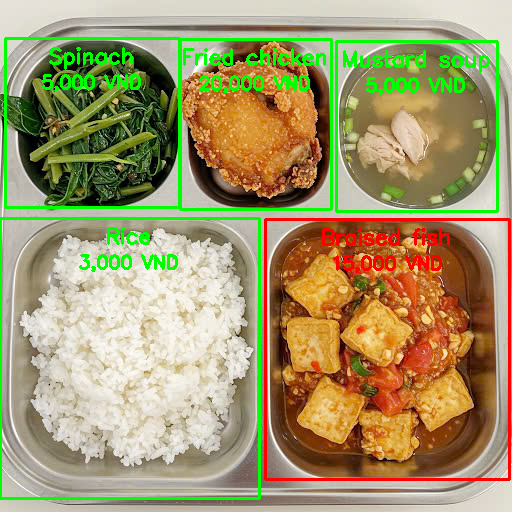

In [7]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/z6598900000748_0dbba5988eec7b83897dd5950ca7f0d0.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/final_model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = [
    'Braised fish', 'Braised meat', 'Braised meat w egg',
    'Fried chicken', 'Fried egg', 'Mustard soup',
    'Rice', 'Sour Broth', 'Spinach', 'Tofu'
]
PRICE_TABLE = {
    'Rice': 3000,
    'Fried chicken': 20000,
    'Braised fish': 15000,
    'Braised meat': 15000,
    'Braised meat w egg': 20000,
    'Fried egg': 5000,
    'Mustard soup': 5000,
    'Sour Broth': 5000,
    'Spinach': 5000,
    'Tofu': 3000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0.0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"🧾 Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)